## Explorign Mass Spectroscopy Deconvolution Data

In [4]:
import os
import numpy as np
import pandas as pd
import re

from NUDT7_ratios import read_grouped_csv
from NUDT7_ratios import remove_dataset_by_filename_content
from NUDT7_ratios import check_signal_to_noise
from NUDT7_ratios import ratios_from_filenames
from NUDT7_ratios import get_ratios_of_expected_peaks
from NUDT7_ratios import pre_crystal_plot
from NUDT7_ratios import post_crystal_plot
from NUDT7_ratios import string_contains
from NUDT7_ratios import post_crystal_calibrated_plot
from NUDT7_ratios import peak_height_outside_of_interest

from io import StringIO
from scipy.signal import find_peaks

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [5]:

data_dir = "/hdlocal/enelson/mass_spec_ratio/NUDT7_Data"
#data_dir = "/home/nelse003/PycharmProjects/mass_spec_ratio/NUDT7_Data"

df_dict = {}
for csv in os.listdir(data_dir):
    csv = os.path.join(data_dir, csv)
    df_dict.update(read_grouped_csv(csv))

keys_to_remove = []
peak_ratio  = []
for key, df in df_dict.items():
    if "blank" in key:
        keys_to_remove.append(key)

for key in set(keys_to_remove):
    del df_dict[key]

keys_to_remove = []
for key, df in df_dict.items():
    try:
        peak_ratio.append(peak_height_outside_of_interest(df))
    except ValueError:
        keys_to_remove.append(key)
    

/hdlocal/enelson/mass_spec_ratio/NUDT7_ratios.py:44: FutureWarning: split() requires a non-empty pattern match.
  split_data = header_re.split(data)


In [3]:
print(df_dict.keys())

dict_keys(['190302 : "+ESI Scan (rt: 7.215-7.992 min, 48 scans) Frag=250.0V blank01.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.201-7.995 min, 49 scans) Frag=250.0V blank02.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.210-7.988 min, 48 scans) Frag=250.0V blank03.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.207-8.001 min, 49 scans) Frag=250.0V blank04.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.204-7.998 min, 49 scans) Frag=250.0V blank05.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.208-7.986 min, 48 scans) Frag=250.0V blank06.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.204-7.997 min, 49 scans) Frag=250.0V blank07.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.199-7.993 min, 49 scans) Frag=250.0V blank08.d  Deconvoluted (Isotope Width=0.0)"\n', '190302 : "+ESI Scan (rt: 7.206-8.000 min, 49 scans) Frag=250.0V blank09.d  D

In [6]:
sample_key = '190301 : "+ESI Scan (rt: 7.203-7.997 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074435_F5a.d  Deconvoluted (Isotope Width=0.0)"\n'

print(df_dict[sample_key])

       Point  X(Daltons)     Y(Counts)
0          0     15000.0  5.641444e-07
1          1     15001.0  3.845424e-05
2          2     15002.0  1.062780e-04
3          3     15003.0  2.344615e-04
4          4     15004.0  4.305320e-04
5          5     15005.0  6.650165e-04
6          6     15006.0  8.809295e-04
7          7     15007.0  9.815170e-04
8          8     15008.0  8.738276e-04
9          9     15009.0  6.013412e-04
10        10     15010.0  3.277151e-04
11        11     15011.0  1.547168e-04
12        12     15012.0  6.985284e-05
13        13     15013.0  3.141039e-05
14        14     15014.0  1.449706e-05
15        15     15015.0  8.092951e-06
16        16     15016.0  8.110250e-06
17        17     15017.0  1.611625e-05
18        18     15018.0  4.261735e-05
19        19     15019.0  1.139812e-04
20        20     15020.0  2.716987e-04
21        21     15021.0  5.335366e-04
22        22     15022.0  8.135565e-04
23        23     15023.0  9.408923e-04
24        24     15024.0 

In [7]:
sample_df = df_dict[sample_key]

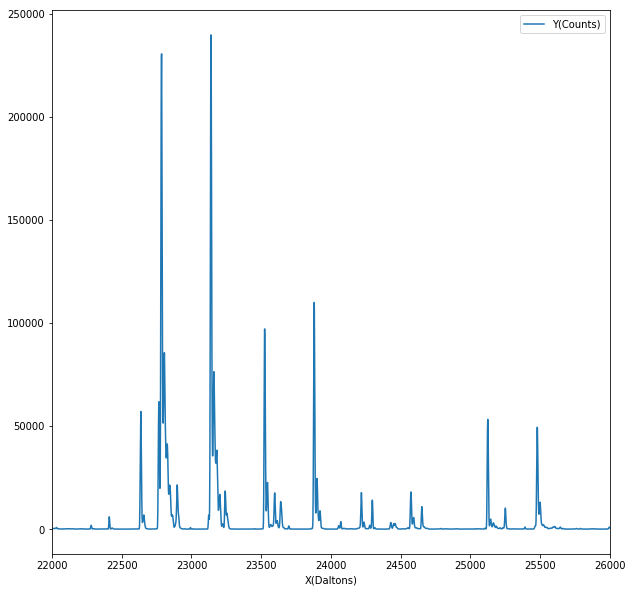

In [10]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(22000,26000))

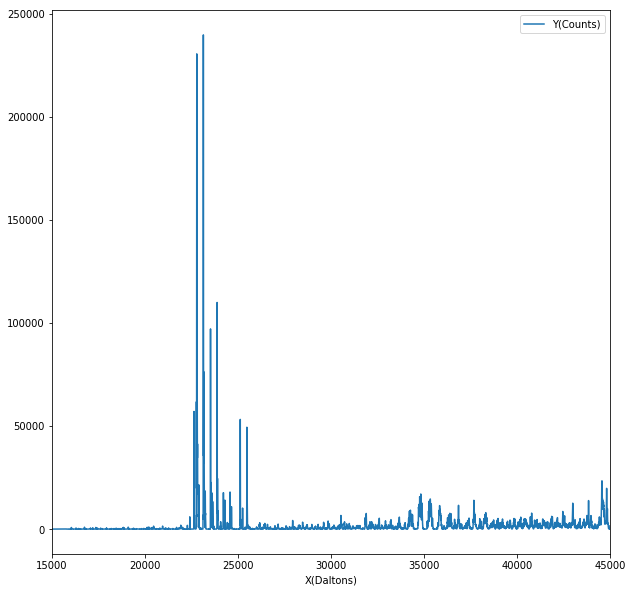

In [9]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line')

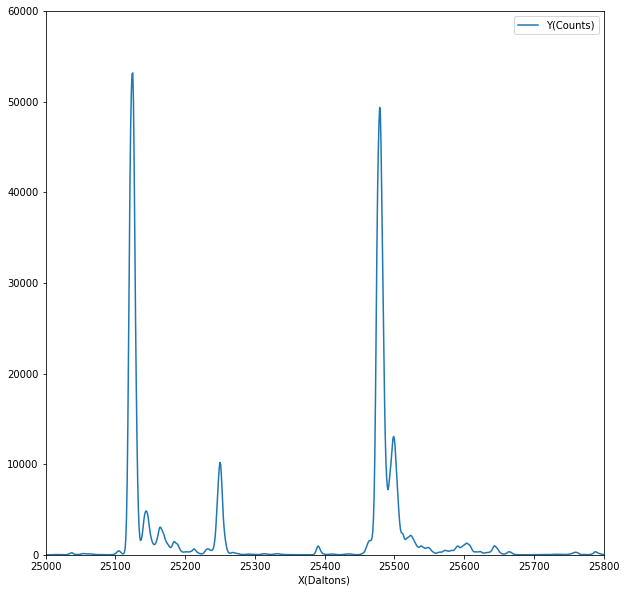

In [7]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(25000,25800),ylim=(0,60000))

In [8]:
unlabelled_peak_df = sample_df[(sample_df['X(Daltons)'] >= 25100) & (sample_df['X(Daltons)'] <= 25300)]

In [9]:
unlabelled_peak_df['Y(Counts)'].sum()

774803.15303421021

In [10]:
labelled_peak_df = sample_df[(sample_df['X(Daltons)'] >= 25454) & (sample_df['X(Daltons)'] <= 25654)]

In [11]:
labelled_peak_df['Y(Counts)'].sum()

846106.78260803223

In [12]:
labelled_peak_df['Y(Counts)'].sum()/unlabelled_peak_df['Y(Counts)'].sum()

1.092028058087515

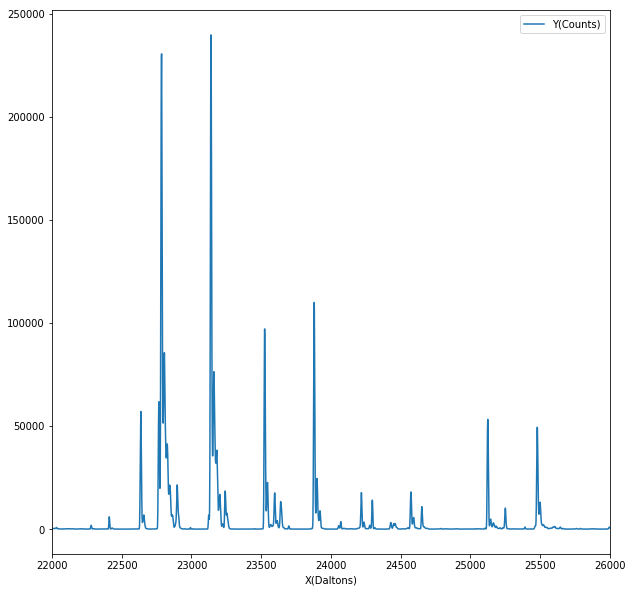

In [13]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22000,26000))

Expected peaks are to seperated by 354. Lokking for pairs

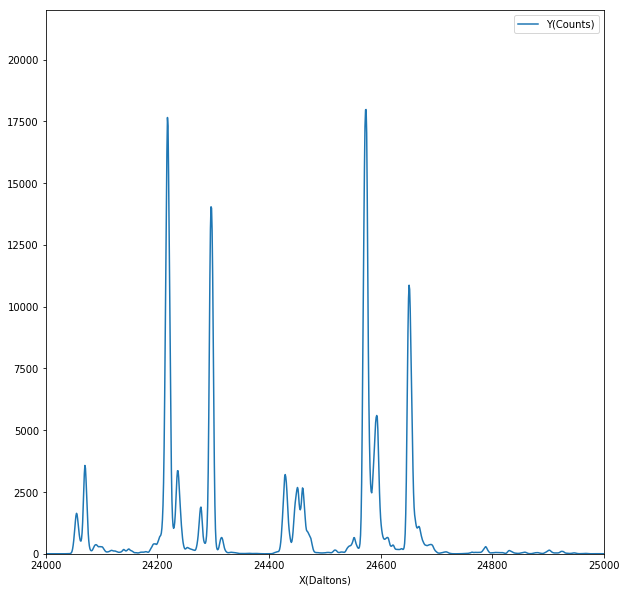

In [14]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(24000,25000),ylim=(0,22000))

In [15]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 24200) & (sample_df['X(Daltons)'] <= 24400)]

In [16]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point          9218.000000
X(Daltons)    24218.000000
Y(Counts)     17657.451172
Name: 9218, dtype: float64

Therefore the maximum should be at 24,572 for that to be a peak

In [17]:
test_label_df = sample_df[(sample_df['X(Daltons)'] >= 24500) & (sample_df['X(Daltons)'] <= 24700)]

In [18]:
test_label_df.loc[test_label_df['Y(Counts)'].idxmax()]

Point          9574.000000
X(Daltons)    24574.000000
Y(Counts)     17981.341797
Name: 9574, dtype: float64

In [19]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 24000) & (sample_df['X(Daltons)'] <= 24100)]

In [20]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point          9070.000000
X(Daltons)    24070.000000
Y(Counts)      3575.023193
Name: 9070, dtype: float64

In [21]:
test_label_df = sample_df[(sample_df['X(Daltons)'] >= 24400) & (sample_df['X(Daltons)'] <= 24500)]

In [22]:
test_label_df.loc[test_label_df['Y(Counts)'].idxmax()]

Point          9429.000000
X(Daltons)    24429.000000
Y(Counts)      3206.845947
Name: 9429, dtype: float64

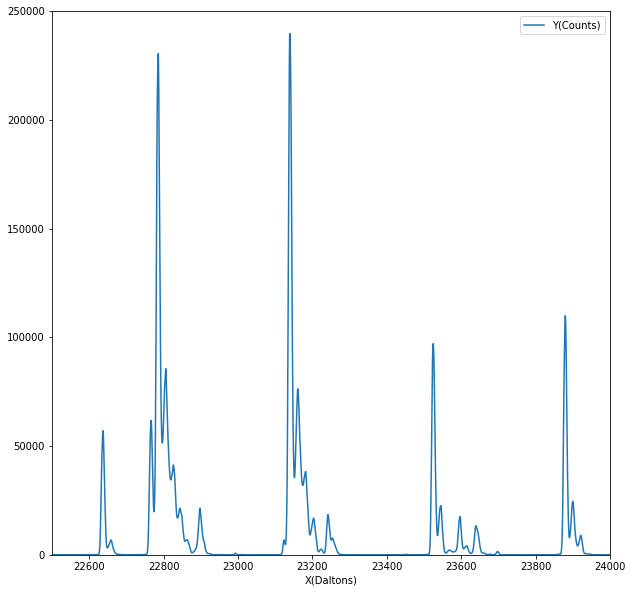

In [23]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22500,24000),ylim=(0,250000))

Looks like two sets of peaks

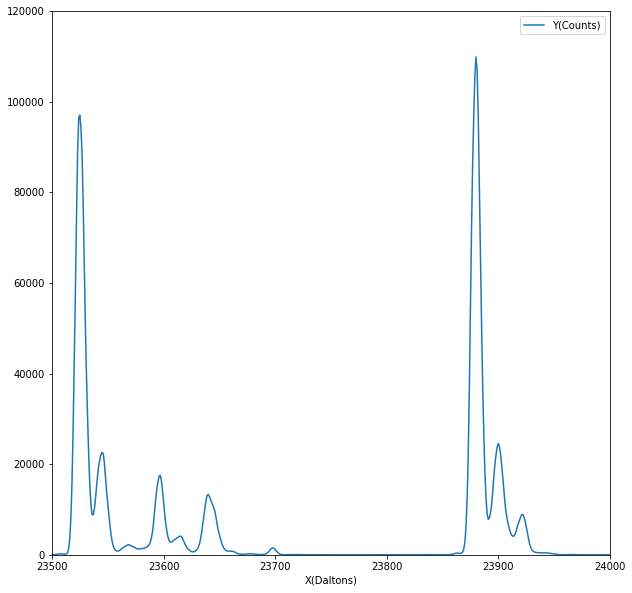

In [24]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(23500,24000),ylim=(0,120000))

In [25]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 23500) & (sample_df['X(Daltons)'] <= 23700)]

In [26]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point          8525.000000
X(Daltons)    23525.000000
Y(Counts)     97079.601562
Name: 8525, dtype: float64

In [27]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 23850) & (sample_df['X(Daltons)'] <= 23950)]

In [28]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point           8880.000000
X(Daltons)     23880.000000
Y(Counts)     109901.679688
Name: 8880, dtype: float64

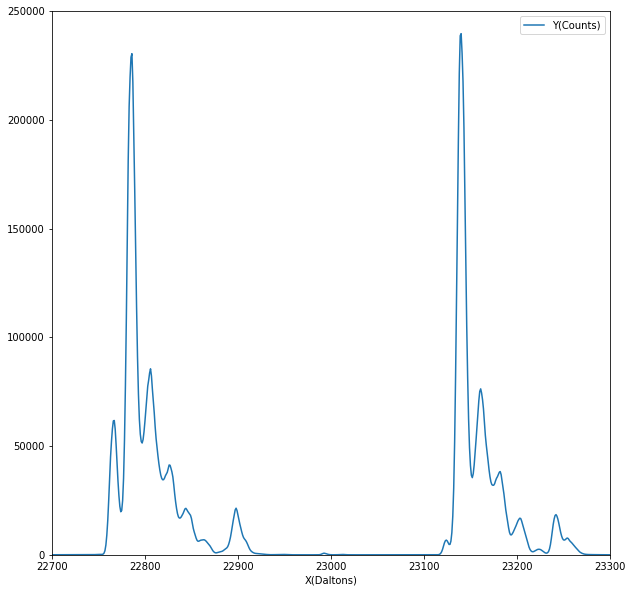

In [29]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22700,23300),ylim=(0,250000))

In [30]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 22750) & (sample_df['X(Daltons)'] <= 22900)]

In [31]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point           7786.000000
X(Daltons)     22786.000000
Y(Counts)     230468.328125
Name: 7786, dtype: float64

In [32]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 23100) & (sample_df['X(Daltons)'] <= 23300)]

In [33]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point           8140.000000
X(Daltons)     23140.000000
Y(Counts)     239670.484375
Name: 8140, dtype: float64

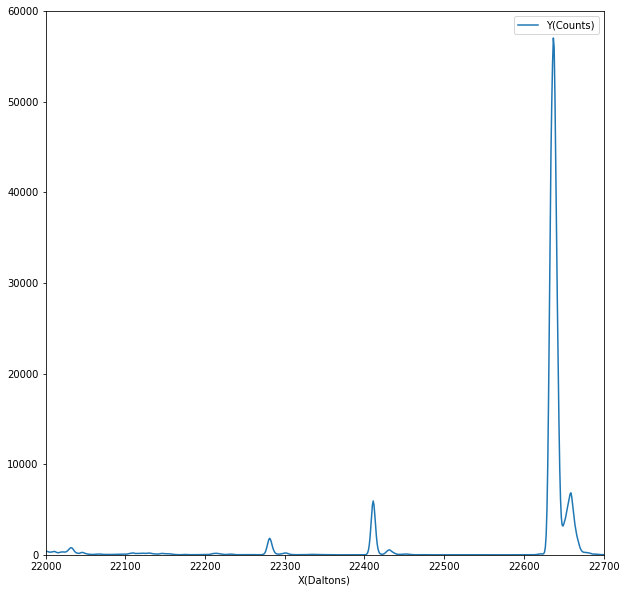

In [34]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22000,22700),ylim=(0,60000))

In [35]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 22600) & (sample_df['X(Daltons)'] <= 22700)]

In [36]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Point          7637.00000
X(Daltons)    22637.00000
Y(Counts)     57046.96875
Name: 7637, dtype: float64

Therefore we have:

| Unlabelled | Labelled |
| --- | --- |
| 25125 | 25479 |
| 24218 | 24574 |
| 23525 | 23879 |
| 22786 | 23140 | 

Peak at 22637 doesnt match next peak down. Could be two weak pairs? Explain 8/9 strongest peaks. Need to look at the continuty of ratios between the sets, and the difference using max peak, and area within defined region from

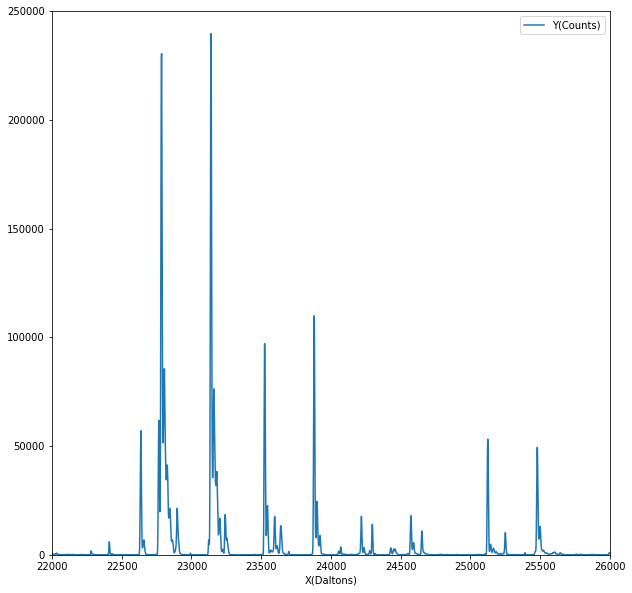

In [20]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',ylim=(0,250000),xlim=(22000,26000))

In [48]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 21000) & (sample_df['X(Daltons)'] <= 26000)]


In [49]:
x

6000      15.237430
6001      11.853443
6002       9.282764
6003       7.878075
6004       7.554580
6005       8.089995
6006       9.665759
6007      12.994101
6008      18.986790
6009      28.647753
6010      41.048599
6011      51.863697
6012      57.545010
6013      58.793873
6014      58.752831
6015      60.012798
6016      61.904072
6017      62.305038
6018      62.223995
6019      62.195091
6020      59.360512
6021      53.483253
6022      47.063545
6023      41.078617
6024      36.403633
6025      33.704678
6026      32.314957
6027      31.941555
6028      32.151249
6029      32.824230
            ...    
10971     11.589504
10972     10.245520
10973      8.987362
10974      7.838108
10975      6.647542
10976      5.534041
10977      4.723999
10978      4.371232
10979      4.536073
10980      5.041343
10981      5.809936
10982      7.541149
10983     12.022938
10984     22.247948
10985     43.387669
10986     84.630600
10987    155.430618
10988    251.957565
10989    352.902924


In [44]:
test_df

,Point,X(Daltons),Y(Counts)
6000,6000,21000.0,15.237430
6001,6001,21001.0,11.853443
6002,6002,21002.0,9.282764
6003,6003,21003.0,7.878075
6004,6004,21004.0,7.554580
6005,6005,21005.0,8.089995
6006,6006,21006.0,9.665759
6007,6007,21007.0,12.994101
6008,6008,21008.0,18.986790
6009,6009,21009.0,28.647753


In [50]:
peaks, _ = find_peaks(x, height=0)

In [54]:
peaks = peaks + 6000

In [55]:
len(peaks)

287

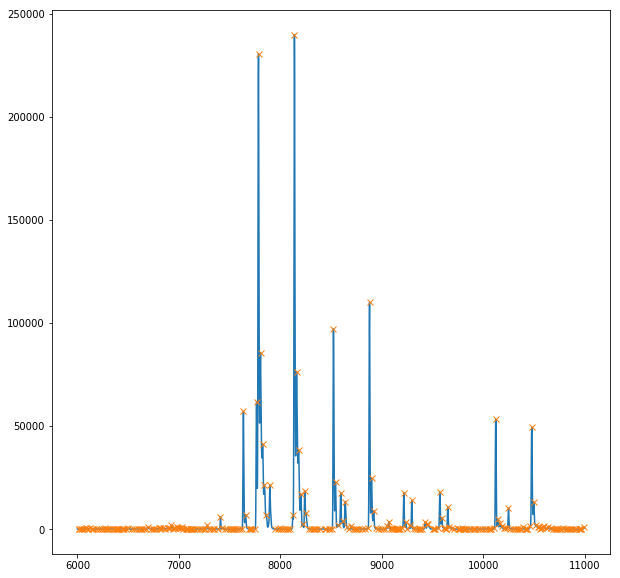

In [56]:
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

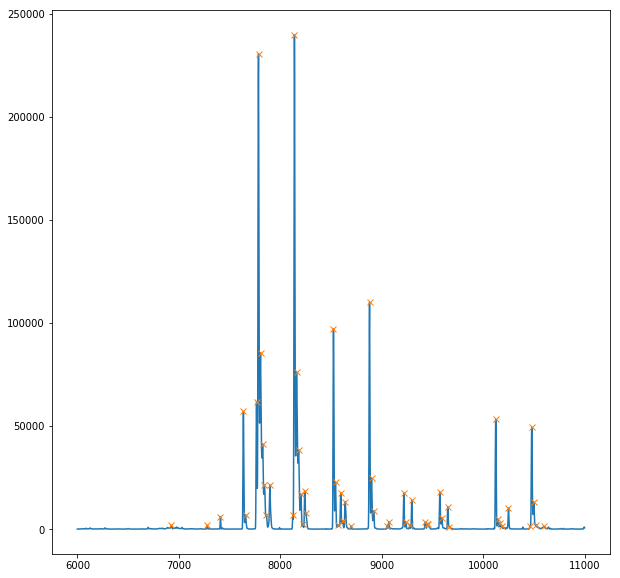

53

In [59]:
peaks, _ = find_peaks(x, height=1000)
peaks = peaks + 6000
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()
len(peaks)

In [66]:
test_df.loc[peaks].nlargest(10,'Y(Counts)')

,Point,X(Daltons),Y(Counts)
8140,8140,23140.0,239670.484375
7786,7786,22786.0,230468.328125
8880,8880,23880.0,109901.679688
8525,8525,23525.0,97079.601562
7806,7806,22806.0,85536.507812
8161,8161,23161.0,76319.835938
7767,7767,22767.0,61769.808594
7637,7637,22637.0,57046.968750
10125,10125,25125.0,53188.777344
10479,10479,25479.0,49392.363281


We recover 6 of the 8 expected peaks in the largest set. Lets check by separation if we can ignore the adducts ,a nd increase to include all

| Unlabelled | Labelled |
| --- | --- |
| 25125 | 25479 |
| 24218 | 24574 |
| 23525 | 23879 |
| 22786 | 23140 | 

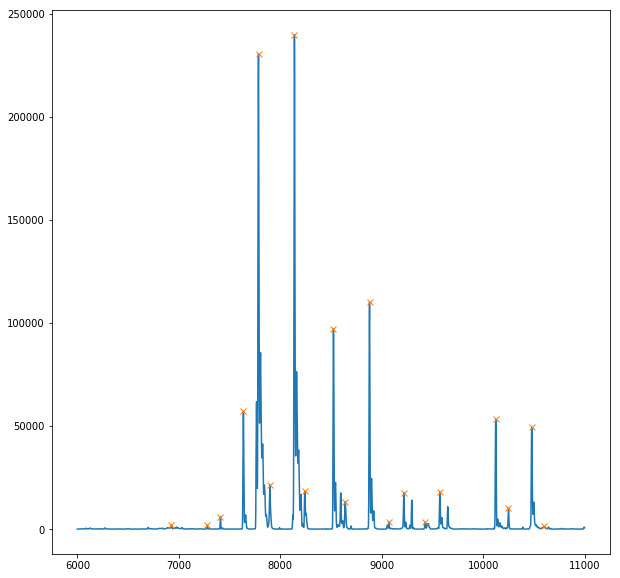

19

In [75]:
peaks, _ = find_peaks(x, height=1000, distance=100)
peaks = peaks + 6000
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()
len(peaks)

In [76]:
test_df.loc[peaks].nlargest(10,'Y(Counts)')

,Point,X(Daltons),Y(Counts)
8140,8140,23140.0,239670.484375
7786,7786,22786.0,230468.328125
8880,8880,23880.0,109901.679688
8525,8525,23525.0,97079.601562
7637,7637,22637.0,57046.968750
10125,10125,25125.0,53188.777344
10479,10479,25479.0,49392.363281
7898,7898,22898.0,21432.384766
8242,8242,23242.0,18477.007812
9574,9574,24574.0,17981.341797


In [77]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 25125-50) & (sample_df['X(Daltons)'] <= 25125+100)]

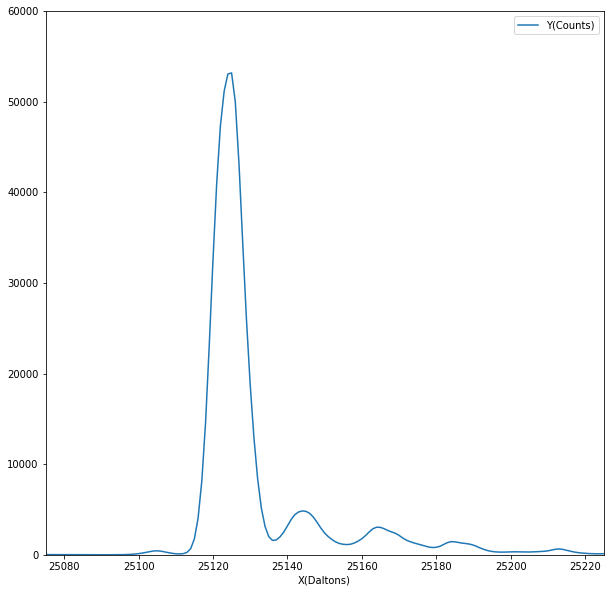

In [78]:
test_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',ylim=(0,60000))

In [86]:
unlabelled_peak_area = test_df['Y(Counts)'].sum()

In [82]:
labelled_df = sample_df[(sample_df['X(Daltons)'] >= 25479-50) & (sample_df['X(Daltons)'] <= 25479+100)]

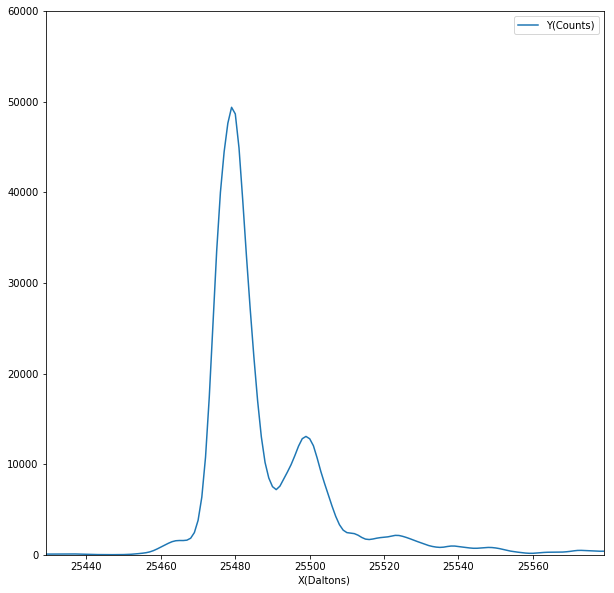

In [83]:
labelled_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',ylim=(0,60000))

In [87]:
labelled_peak_area = labelled_df['Y(Counts)'].sum()

In [88]:
unlabelled_peak_area/ (unlabelled_peak_area + labelled_peak_area)

0.45418843012159876

In [89]:
labelled_peak_area/ (unlabelled_peak_area + labelled_peak_area)

0.54581156987840129

In [90]:
labelled_peak_height = labelled_df['Y(Counts)'].max()

In [92]:
unlabelled_df = test_df
unlabelled_peak_height = unlabelled_df['Y(Counts)'].max()

In [93]:
labelled_peak_height/(unlabelled_peak_height + labelled_peak_height)

0.48149555542388472

In [94]:
unlabelled_peak_height/(unlabelled_peak_height + labelled_peak_height)

0.51850444457611533

In [130]:
def peak_height_outside_of_interest(df, min_interest = 22000, max_interest = 26000):
    """ Find ratio between largest peak inside area of interst, and outside """
    
    peaks, _ = find_peaks(df['Y(Counts)'], height=1000, distance=100)
    
    peaks_df = df.loc[peaks]
    
    interest_peaks_df = peaks_df[(peaks_df['X(Daltons)'] >= min_interest) & (peaks_df['X(Daltons)'] <= max_interest)]
    uninterest_peaks_df = peaks_df[(peaks_df['X(Daltons)'] < min_interest) | (peaks_df['X(Daltons)'] > max_interest)]
    
    max_uninterest_peak = uninterest_peaks_df.nlargest(1,'Y(Counts)')
    max_interest_peak = interest_peaks_df.nlargest(1,'Y(Counts)')
    
    ratio_of_peak_outside_area = max_uninterest_peak['Y(Counts)'].values/(max_interest_peak['Y(Counts)'].values + max_uninterest_peak['Y(Counts)'].values)

    return float(ratio_of_peak_outside_area)

peak_height_outside_of_interest(sample_df)

0.08895218335800459

In [ ]:
expected_unlabelled_peaks = np.array([25125, 24218, 23525, 22786])
expected_labelled_peaks = expected_unlabelled_peaks + 354


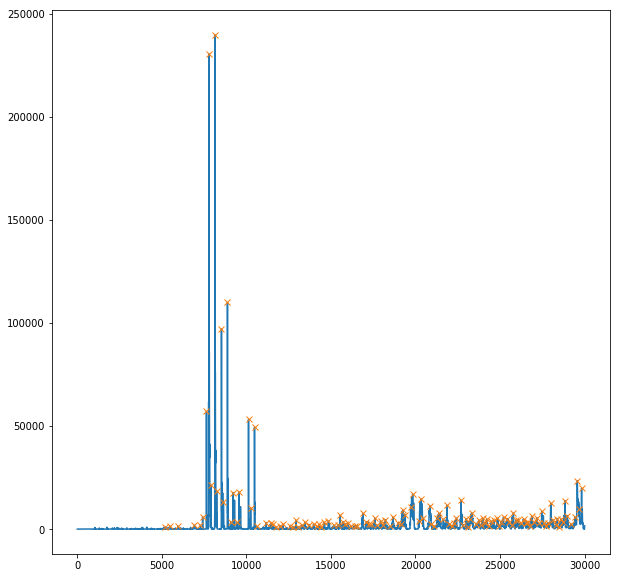

In [113]:
x = sample_df['Y(Counts)']
peaks, _ = find_peaks(x, height=1000, distance=100)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

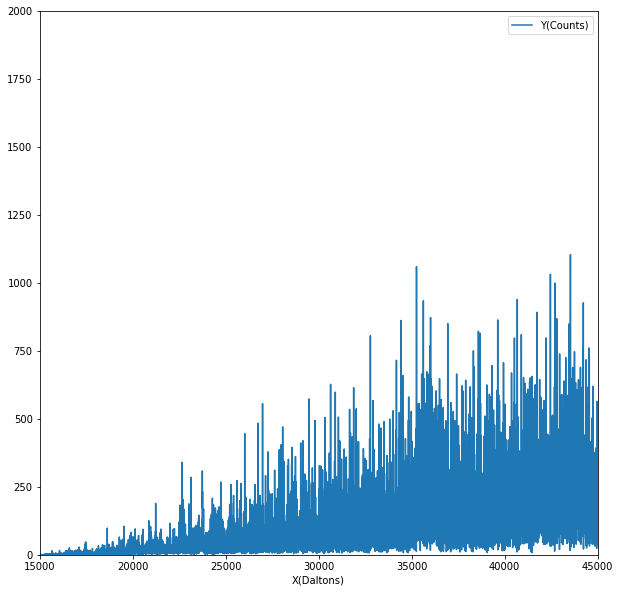

In [140]:
for key, df in df_dict.items():
     if "190227 : \"+ESI Scan (rt: 7.200-7.994 min, 49 scans) Frag=250.0V blank01.d" in key:
            df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',ylim=(0,2000))

KeyError: 1

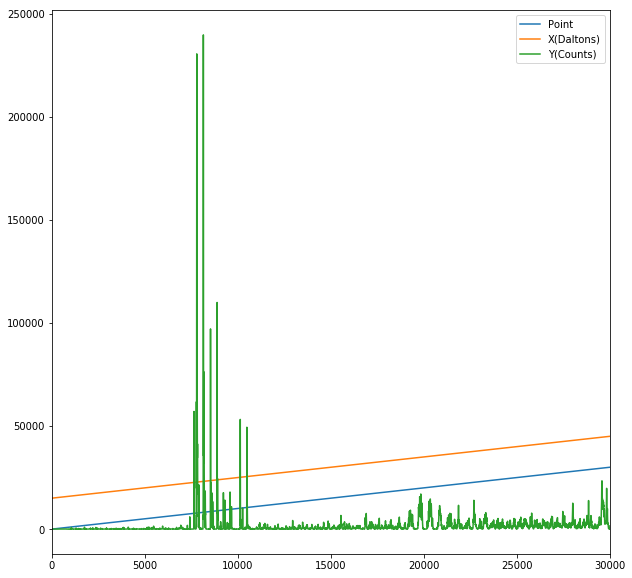

In [18]:
sample_df[.plot()

expected_unlabelled_peaks = np.array([25125, 24218, 23525, 22786])
expected_labelled_peaks = expected_unlabelled_peaks + 354

def peak_nearby(df, peak, delta=10, left_range=50, right_range=100):

    peak_df = df[(df['X(Daltons)'] >= peak-delta)
            & (df['X(Daltons)'] <= peak+delta)]
    #print(peak_df)
    peak_loc = peak_df.loc[peak_df['Y(Counts)'].idxmax()]['X(Daltons)']
    peak_height = peak_df['Y(Counts)'].max()
    peak_area_df = sample_df[(sample_df['X(Daltons)'] >= peak-left_range)
            & (sample_df['X(Daltons)'] <= peak+right_range)]
    peak_area = peak_area_df['Y(Counts)'].sum()

    return peak_loc, peak_height, peak_area


x = sample_df['Y(Counts)']
peaks, _ = find_peaks(x, height=1000, distance=100)
peaks_df = df.loc[peaks]

for peak, peak_labelled in zip(expected_unlabelled_peaks, expected_labelled_peaks):

    print(peak, peak_labelled)
    
    peak_loc, peak_height, peak_area = peak_nearby(sample_df, peak, 
                                                   delta=10, 
                                                   left_range=50, 
                                                   right_range=100)
    
    labelled_peak_loc, \
    labelled_peak_height,\
    labelled_peak_area = peak_nearby(df,
                                     peak_labelled, 
                                     delta=10,
                                     left_range=50,right_range=100)

    print(peak_loc,labelled_peak_loc)

    



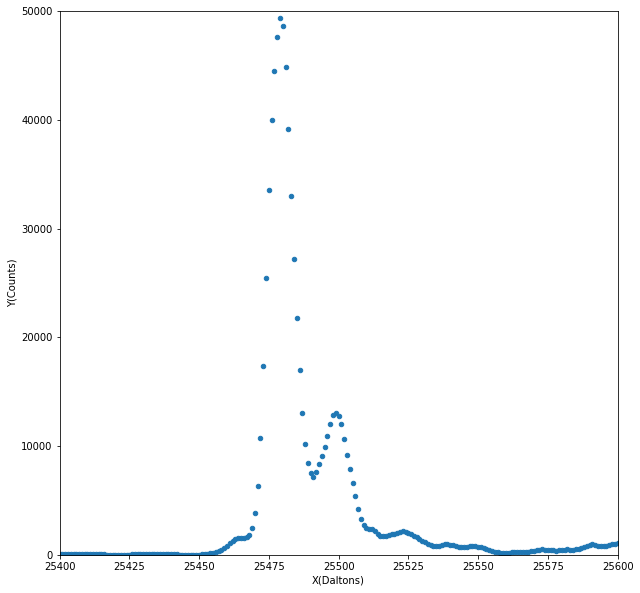

In [69]:
    sample_key = '190301 : "+ESI Scan (rt: 7.203-7.997 min, 49 scans)' \
                 ' Frag=250.0V NUDT7A_p026_CI074435_F5a.d' \
                 '  Deconvoluted (Isotope Width=0.0)"\n'

    sample_df = df_dict[sample_key]

sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='scatter',ylim=(0,50000),xlim=(25400,25600))

Now Looking at plots of ratios. Load in data once:

In [2]:
data_dir = "/dls/science/groups/i04-1/elliot-dev/mass_spec_ratio/NUDT7_Data"
# Parse all csv in folder to separate into individual deconvolutions by headers
df_dict = {}
for csv in os.listdir(data_dir):
    csv = os.path.join(data_dir, csv)
    df_dict.update(read_grouped_csv(csv))

# Remove blank datasets
df_dict = remove_dataset_by_filename_content(df_dict, key_string="blank")
# Remove un-needed dataset
df_dict = remove_dataset_by_filename_content(df_dict,
                                             key_string="NUDT7A_p026_NU0000308a"
                                                        "_post_gel_filtration")

# remove datasets that do not pass signal threshold
# currently 1000 counts in interest area 22000-26000
# TODO Move parameters up to non hard coded region
df_dict, peak_ratios = check_signal_to_noise(df_dict)

# From Exploratory analysis these pairs of peaks are present
# showing that degradation into three sets of paired peaks
expected_unlabelled_peaks = np.array([25125, 24218, 23525, 22786])
expected_labelled_peaks = expected_unlabelled_peaks + 354

# Translate keys (filenames) into ratios
# Split across two dicitionaries to parse
# intended ratio and expected ratio
intended_ratio_dict = ratios_from_filenames(df_dict)

# Process all deconvolutions to ratios of peaks
ratio_df_list = []
for key, df in df_dict.items():
    ratio_df = get_ratios_of_expected_peaks(df,
                                            expected_unlabelled_peaks,
                                            expected_labelled_peaks)

    # Get weights of contributing peaks based on peak height
    height_weight = (ratio_df['peak_height'] + ratio_df['labelled_peak_height']) \
                    / (ratio_df['labelled_peak_height'].sum() + \
                       ratio_df['peak_height'].sum())

    # Get weights of contributing peaks based on peak area
    area_weight = (ratio_df['peak_area'] + ratio_df['labelled_peak_area']) \
                  / (ratio_df['labelled_peak_area'].sum() + \
                     ratio_df['peak_area'].sum())

    # Get a single weighted ratio using peak heights
    weighted_height_ratio = height_weight * ratio_df['height_ratio']
    weighted_height_ratio = weighted_height_ratio.sum()

    # Get a single weighted ratio using peak areas
    weighted_area_ratio = area_weight * ratio_df['area_ratio']
    weighted_area_ratio = weighted_area_ratio.sum()

    # Store weights and ratios, and key in ratio dataframe
    ratio_df['height_weights'] = height_weight
    ratio_df['area_weights'] = area_weight
    ratio_df['weighted_height_ratio'] = weighted_height_ratio
    ratio_df['weighted_area_ratio'] = weighted_area_ratio
    ratio_df['intended_ratio'] = intended_ratio_dict[key]
    ratio_df['key'] = key

    # For concatenating results
    ratio_df_list.append(ratio_df)

ratio_df = pd.concat(ratio_df_list)

/dls/science/groups/i04-1/elliot-dev/mass_spec_ratio/NUDT7_ratios.py:44: FutureWarning: split() requires a non-empty pattern match.
  split_data = header_re.split(data)


Split into two dataframes

In [3]:
ratio_df['pre_crystal'] = ratio_df['key'].apply(string_contains, match='L_')
pre_crystal_df = ratio_df[ratio_df['pre_crystal'] == True]
post_crystal_df = ratio_df[ratio_df['pre_crystal'] == False]

Plotting

[0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.75 0.8  0.9  1.  ]
intended_ratio
0.00    0.003307
0.10    0.042297
0.20    0.308075
0.30    0.290241
0.40    0.616585
0.50    0.551568
0.60    0.719755
0.70    0.827915
0.75    0.842789
0.80    0.924831
0.90    0.946729
1.00    0.958738
Name: weighted_height_ratio, dtype: float64


/dls/science/groups/i04-1/elliot-dev/mass_spec_ratio/NUDT7_ratios.py:268: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


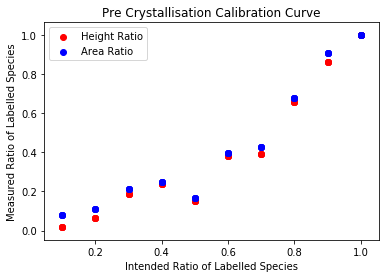

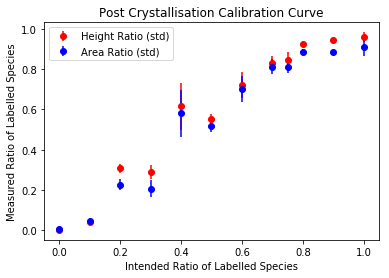

In [4]:
pre_crystal_plot(pre_crystal_df)
post_crystal_plot(post_crystal_df)

Swapping to Calibrated ratio from pre_crystal experiements. Interpolating the missing value, and setting no peak at 0 intedned ratio

In [5]:
df = pre_crystal_df[['intended_ratio','weighted_height_ratio']]
df = df.drop_duplicates()
df = df.sort_values(by=['intended_ratio'])
intended_ratio = df['intended_ratio']
expected_ratio = df['weighted_height_ratio']
interp_val = np.interp(0.75, intended_ratio, expected_ratio)

df1 = pd.DataFrame({'intended_ratio': [0.75,0],
           'weighted_height_ratio': [interp_val,0]})
df = df.append(df1)
df = df.sort_values(by=['intended_ratio'])
df = df.rename(columns={'weighted_height_ratio': 'calibrated_ratio'})
post_crystal_df = pd.merge(post_crystal_df, df, on='intended_ratio')

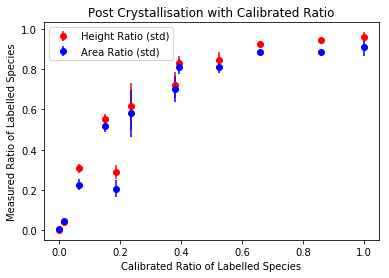

In [7]:
post_crystal_calibrated_plot(post_crystal_df)

In [15]:
for key in df_dict.keys():
    if 'CI074433' in key:
        print(key)
    

190225 : "+ESI Scan (rt: 7.216-7.993 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_H1a_multiple_xtal.d  Deconvoluted (Isotope Width=0.0)"

190225 : "+ESI Scan (rt: 7.208-7.986 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_H1a_single_xtal.d  Deconvoluted (Isotope Width=0.0)"

190225 : "+ESI Scan (rt: 7.217-7.995 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_H1c_multiple_xtal.d  Deconvoluted (Isotope Width=0.0)"

190225 : "+ESI Scan (rt: 7.212-7.989 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_H1c_single_xtal.d  Deconvoluted (Isotope Width=0.0)"

190225 : "+ESI Scan (rt: 7.215-7.992 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_H1d_multiple_xtal.d  Deconvoluted (Isotope Width=0.0)"

190302 : "+ESI Scan (rt: 7.208-7.985 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_A6d.d  Deconvoluted (Isotope Width=0.0)"

190302 : "+ESI Scan (rt: 7.202-7.996 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_B7c.d  Deconvoluted (Isotope Width=0.0)"

190302 : "+ESI Scan (rt: 7.204-7.998 min, 49 

In [24]:
key = '190302 : "+ESI Scan (rt: 7.202-7.996 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_C5c.d  Deconvoluted (Isotope Width=0.0)"\n'

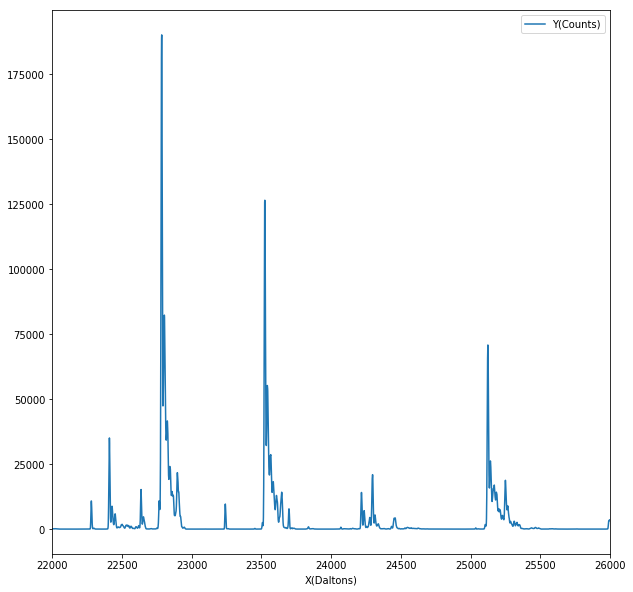

In [31]:
key = '190302 : "+ESI Scan (rt: 7.202-7.996 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_C5c.d  Deconvoluted (Isotope Width=0.0)"\n'
no_label_df = df_dict[key]
no_label_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(22000,26000))

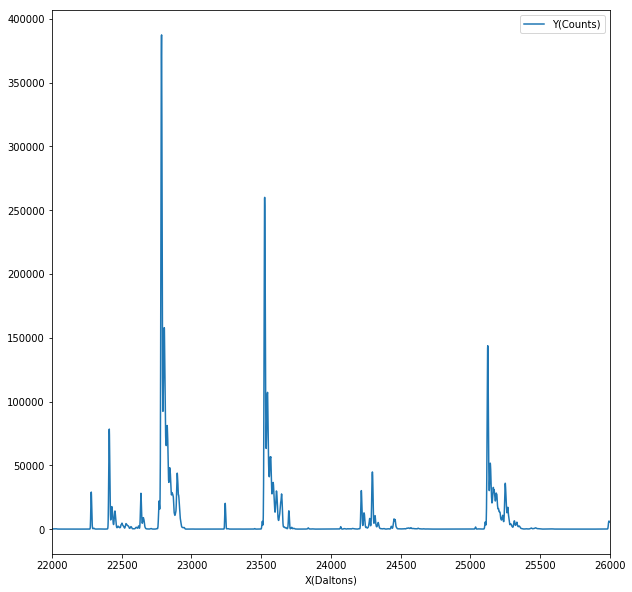

In [29]:
key = '190302 : "+ESI Scan (rt: 7.202-7.996 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_C3c.d  Deconvoluted (Isotope Width=0.0)"\n'
no_label_df = df_dict[key]
no_label_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(22000,26000))

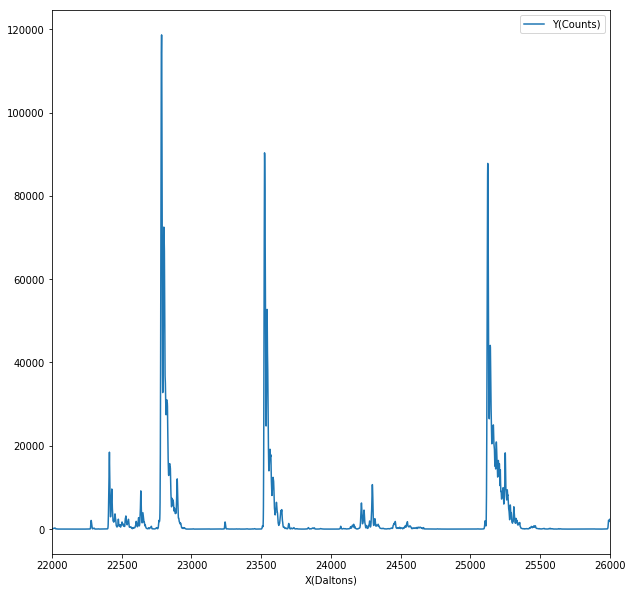

In [28]:
key = '190302 : "+ESI Scan (rt: 7.208-7.985 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_A6d.d  Deconvoluted (Isotope Width=0.0)"\n'
no_label_df = df_dict[key]
no_label_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(22000,26000))